In [2]:
#importing the required libraries
import math 
import numpy as np
import random
import collections
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#dictionaries for old_algorithm and new algorithm
old_version_queens={}
new_version_queens={}




#map for charcter and vice versa conversions
char_to_int={}
int_to_char={}
c='1'
for i in range(1,9):
    int_to_char[i]=c
    char_to_int[c]=i
    c=chr(ord(c)+1)
    
    


#initialisng the initial population for both the algorithm
pos=random.randint(1,8)
s=""
for i in range(8):
    s+=(int_to_char[pos])

l1=[s for i in range(20)]
l2=l1

In [4]:
#all the helper functions for the old version of the 8 queens problem

#reproduction
def reproduce(a,b):
    i=random.randint(1,6)
    return a[0:i]+b[i:]


#mutation
def mutate(a):
    idx=random.randint(0,7)
#     n1=-1
#     n2=-1
#     if (idx!=0):
#         n1=char_to_int[a[idx-1]]
#     if (idx!=7):
#         n2=char_to_int[a[idx+1]]
        
    
#     number=char_to_int[a[idx]]
    
#     while (number==a[idx] or number==n1 or number==n2):
    number=random.randint(1,8)
        
    ans=""
    for i in range(8):
        if (i==idx):
            ans+=int_to_char[number]
        else:
            ans+=a[i]
    return ans


#returns fitness value of an individual
def fitness_function(a):
    power=29
    total=0
    for i in range(8):
        col_no=i
        row_no=(int)(a[i])-1
        x=0
        for j in range(8):
            if (j!=i):
                c_no=j
                r_no=(int)(a[j])-1
                if (r_no==row_no):
                    x+=1
                if (r_no+c_no==row_no+col_no):
                    x+=1
                if (r_no-c_no==row_no-col_no):
                    x+=1
        total+=x
    total=total/2
    power-=total
    return power
    

def random_selection(population):
    n=len(population)
    #calculate fitness function value for each individual
    fitness_values=[]
    for i in range(n):
        fitness_values.append(fitness_function(population[i]))
    return random.choices(population,weights=fitness_values,k=1)[0]


possible_ans=[]
def genetic_algorithm(population):
    #initialisations
    possible_ans.clear()
    x=40000
    gen_no=1
    flag=False
    
    while (x!=0):
        #caring for the counter
        x-=1
        
        #calculates the average fitness value of a generation
        n=len(population)
        
        average=0
        for i in range(n):
            average=max(fitness_function(population[i]),average)
        old_version_queens[gen_no]=average
        
        gen_no+=1
        
        
        #the algorithm
        new_population=[]
        for i in range(n):
            s1=random_selection(population)
            s2=random_selection(population)
            s3=reproduce(s1,s2)
            #code for mutation goes here
            #for mutation, since it is rare lets benchmark
            #the peobablity to 0.1
            p=random.random()
            if (p>=0.4):
                new_population.append(mutate(s3))
            else:
                new_population.append(s3)
        population=new_population
        
        
        for i in range(len(population)):
            if (fitness_function(population[i])==29):
                flag=True
                possible_ans.append(population[i])
                gen_no+=1
                old_version_queens[gen_no]=29
                break
            
        
        if (flag==True):
            break
            
        
    if (flag==True):
        for i in range(len(possible_ans)):
            if (fitness_function(possible_ans[i])==29):
                return possible_ans[i]
    idx=-1
    f_val=-1
    for i in range(len(population)):
        if (f_val < fitness_function(population[i])):
            f_val=fitness_function(population[i])
            idx=i
    
    return population[idx]
    


# x1=genetic_algorithm(l1)

                
# # x = np.array([1, 2, 3, 4])  # X-axis points 
# # y = x*2  # Y-axis points 
  
# # plt.plot(x, y)  # Plot the chart 
# # plt.show()  # display 
# print(fitness_function(x1))
# list_temp_x=[]
# list_temp_y=[]
# for i in old_version_queens.keys():
#     list_temp_x.append(i)
#     list_temp_y.append(old_version_queens[i])

# x=np.array(list_temp_x)
# y=np.array(list_temp_y)
# plt.plot(x,y)
# plt.show()
# print(np.amax(x))

In [5]:
def mutate_new(a):
    idx=random.randint(0,7)
    curr=char_to_int[a[idx]]
    n3=curr
    n1=-1
    n2=-1
    
    if (idx!=0):
        n1=char_to_int[a[idx-1]]
    if (idx!=len(a)-1):
        n2=char_to_int[a[idx+1]]
        
    while(curr==n3 or curr==n1 or curr==n2):
        curr=random.randint(1,8)
        
    ans=""
    for i in range(len(a)):
        if(i==idx):
            ans+=int_to_char[curr]
        else:
            ans+=a[i]
    return ans


def reproduce_new(s1,s2):
    list1=random.sample(range(0,8),3)
    list1.sort()
    
    sa=s1[0:list1[0]]
    sb=s1[list1[0]:list1[1]]
    sc=s1[list1[1]:list1[2]]
    sd=s1[list1[2]:]
    
    
    s21=s2[0:list1[0]]
    s22=s2[list1[0]:list1[1]]
    s23=s2[list1[1]:list1[2]]
    s24=s2[list1[2]:]

    list_kids=[]
    list_kids.append(sa+sb+s23+s24)
    list_kids.append(sa+s22+sc+s24)
    list_kids.append(sa+s22+s23+sd)
    list_kids.append(s21+s22+sc+sd)
    list_kids.append(s21+sb+s23+sd)
    list_kids.append(s21+sb+sc+s24)
    
    return list_kids


new_algo_entries={}
possible_ans_2=[]
def genetic_algo_new(population):
    x_counter=1000
    gen_no=1
    possible_ans_2.clear()
    flag=False
    while(x_counter!=0):
        x_counter-=1
        
        n=len(population)
        
        average=0
        for i in range(n):
            average=max(fitness_function(population[i]),average)
        
        new_algo_entries[gen_no]=average
        gen_no+=1
        
        
        the_remaining_pop=[]
        new_population=[]
        for i in range(n):
            s1=random_selection(population)
            s2=random_selection(population)
            
            list1=reproduce_new(s1,s2)
            
            child1=-1
            child2=-1
            f_val=-1
            for i in range(6):
                if(f_val < fitness_function(list1[i])):
                    f_val=fitness_function(list1[i])
                    child1=i
            f_val=-1       
            for i in range(6):
                if(f_val < fitness_function(list1[i])  and i!=child1):
                    f_val=fitness_function(list1[i])
                    child2=i
                    
            
            p=random.random()
            lt1=[]
            if((p>=0.4) or (p>=0.1 and gen_no<=100)):
                lt1.append(mutate_new(list1[child1]))
                lt1.append(mutate_new(list1[child2]))
                the_remaining_pop.append(lt1[1])
                new_population.append(lt1[0])
                
            else:
                lt1.append((list1[child1]))
                lt1.append((list1[child2]))
                the_remaining_pop.append(lt1[1])
                new_population.append(lt1[0])
                
                
            
            
        fitness_values=[]
        for i in range(n):
            fitness_values.append(fitness_function(the_remaining_pop[i]))
        x=random.choices(the_remaining_pop,weights=fitness_values,k=5)
        new_population=new_population+x
        population=new_population
        
        
        for i in range(len(population)):
            if (fitness_function(population[i])==29):
                flag=True
                possible_ans_2.append(population[i])
                gen_no+=1
                new_algo_entries[gen_no]=29
                break
            
        
        if (flag==True):
            break
                
                
    if (flag==True):
        for i in range(len(possible_ans_2)):
            if (fitness_function(possible_ans_2[i])==29):
                return possible_ans_2[i]
        
        
    idx=-1
    f_val=-1
    for i in range(len(population)):
        if (f_val < fitness_function(population[i])):
            f_val=fitness_function(population[i])
            idx=i
            
    return population[idx]
    



# x1_new=genetic_algo_new(l2)
# print(fitness_function(x1_new))
# print(x1_new)
# list_temp_x_new=[]
# list_temp_y_new=[]
# for i in new_algo_entries.keys():
#     list_temp_x_new.append(i)
#     list_temp_y_new.append(new_algo_entries[i])

# x_new=np.array(list_temp_x_new)
# y_new=np.array(list_temp_y_new)
# plt.plot(x_new,y_new)
# plt.show()
# print(np.amax(x_new))
    

In [6]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)


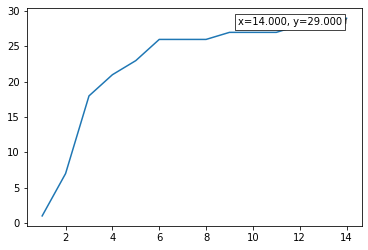

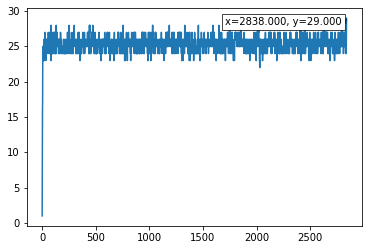

In [7]:
# def main():
# #     random.seed(10)
#     pos_temp=random.randint(1,8)
#     s_temp=""
#     for i in range(8):
#         s_temp+=(int_to_char[pos_temp])

#     l1_temp=[s for i in range(20)]
#     x1_new=genetic_algo_new(l1_temp)
        
#     list_temp_x_new=[]
#     list_temp_y_new=[]
#     for i in new_algo_entries.keys():
#         list_temp_x_new.append(i)
#         list_temp_y_new.append(new_algo_entries[i])

#     x_new=np.array(list_temp_x_new)
#     y_new=np.array(list_temp_y_new)
#     plt.xlabel()

#     fig, ax = plt.subplots()
#     ax.plot(x_new,y_new)

#     annot_max(x_new,y_new)
    
#     x1=genetic_algorithm(l1)

                
#     # x = np.array([1, 2, 3, 4])  # X-axis points 
#     # y = x*2  # Y-axis points 

#     # plt.plot(x, y)  # Plot the chart 
#     # plt.show()  # display 
    
#     list_temp_x=[]
#     list_temp_y=[]
#     for i in old_version_queens.keys():
#         if(old_version_queens[i] != 29):
#             list_temp_x.append(i)
#             list_temp_y.append(old_version_queens[i])
#         else:
#             list_temp_x.append(i)
#             list_temp_y.append(old_version_queens[i])
#             break
    
        
#     x=np.array(list_temp_x)
#     y=np.array(list_temp_y)
#     fig1, ax1 = plt.subplots()
#     ax1.plot(x,y)
    
#     annot_max(x,y)
#     plt.show()

# #     plt.plot(x_new,y_new)
# #     plt.plot(x,y)
# #     plt.legend(["Improved Algorithm","Orignal Algorithm"])
# #     annot_max(x,y)
    
#     plt.show()
    
# if __name__=="__main__":
#     main()



        

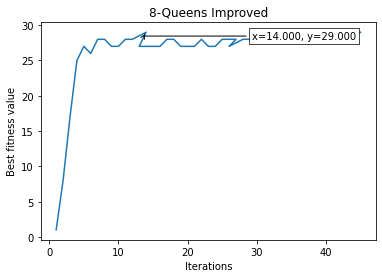

In [22]:
pos_temp=random.randint(1,8)
s_temp=""
for i in range(8):
    s_temp+=(int_to_char[pos_temp])

l1_temp=[s for i in range(20)]
x1_new=genetic_algo_new(l1_temp)

list_temp_x_new=[]
list_temp_y_new=[]
# for i in new_algo_entries.keys():
#     if(new_version_queens[i] != 29):
#         list_temp_x_new.append(i)
#         list_temp_y_new.append(new_version_queens[i])
#     else:
#         list_temp_x_new.append(i)
#         list_temp_y_new.append(new_version_queens[i])
#         break

for i in new_algo_entries.keys():
    if()
x_new=np.array(list_temp_x_new)
y_new=np.array(list_temp_y_new)


fig, ax = plt.subplots()
ax.plot(x_new,y_new)
plt.title("8-Queens Improved")
plt.xlabel("Iterations")
plt.ylabel("Best fitness value")

annot_max(x_new,y_new)
    

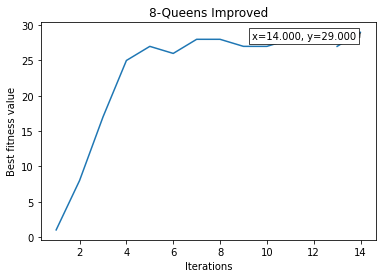

In [25]:
list_temp_x_new=[]
list_temp_y_new=[]
# for i in new_algo_entries.keys():
#     if(new_version_queens[i] != 29):
#         list_temp_x_new.append(i)
#         list_temp_y_new.append(new_version_queens[i])
#     else:
#         list_temp_x_new.append(i)
#         list_temp_y_new.append(new_version_queens[i])
#         break

for i in new_algo_entries.keys():
    if(i==15):
        break
    else:
        list_temp_x_new.append(i)
        list_temp_y_new.append(new_algo_entries[i])
x_new=np.array(list_temp_x_new)
y_new=np.array(list_temp_y_new)


fig, ax = plt.subplots()
ax.plot(x_new,y_new)
plt.title("8-Queens Improved")
plt.xlabel("Iterations")
plt.ylabel("Best fitness value")

annot_max(x_new,y_new)

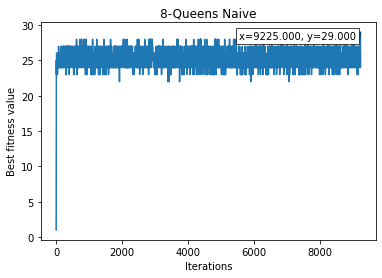

In [19]:
x1=genetic_algorithm(l1)


# x = np.array([1, 2, 3, 4])  # X-axis points 
# y = x*2  # Y-axis points 

# plt.plot(x, y)  # Plot the chart 
# plt.show()  # display 

list_temp_x=[]
list_temp_y=[]
for i in old_version_queens.keys():
    if(old_version_queens[i] != 29):
        list_temp_x.append(i)
        list_temp_y.append(old_version_queens[i])
    else:
        list_temp_x.append(i)
        list_temp_y.append(old_version_queens[i])
        break


x=np.array(list_temp_x)
y=np.array(list_temp_y)
fig1, ax1 = plt.subplots()
ax1.plot(x,y)
plt.title("8-Queens Naive")
plt.xlabel("Iterations")
plt.ylabel("Best fitness value")
annot_max(x,y)
plt.show()


#     plt.plot(x_new,y_new)
#     plt.plot(x,y)
#     plt.legend(["Improved Algorithm","Orignal Algorithm"])
#     annot_max(x,y)

plt.show()
